In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

导入

In [2]:
def caculatePk(input, lag, method):
    if method == "LB":
        lag += 1
    acf = np.ones(lag)
    N = len(input)
    u = input.mean()
    for k in range(0, lag):
        upsum = 0
        downsum = 0
        for i in range(0, N - k):
            upsum += (input[i] - u) * (input[i + k] - u)
        for i in range(0, N):
            downsum += (input[i] - u) ** 2
        acf[k] = (upsum / downsum)
    return acf

延迟k相关系数计算函数

In [3]:
def caculateLB(Pk, input):
    LB = np.zeros(len(Pk))
    n = len(input)
    m = len(Pk)
    for i in range(1, m):
        for j in range(1, i + 1):
            LB[i] += n * (n + 2) * (Pk[j]**2 / (n - j))
    return LB[1:]

LB统计量计算函数

In [4]:
def drawer(input, Pk):
    plt.figure()
    inputplot = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    Pkplot = plt.subplot2grid((2, 2), (1, 0))

    twosigma = np.ones(len(Pk))
    n = len(input)
    twosigma[0] = ((1 / n) ** 0.5)
    for i in range(1, len(Pk)):
        sum = 0
        for j in range(0, i):
            sum += Pk[j] ** 2
        twosigma[i] = (((1 / n) * (1 + 2 * sum)) ** 0.5)

    Pkplot.bar(range(len(Pk)), Pk)
    Pkplot.fill_between(range(len(Pk)), -1 * twosigma, twosigma, color='lightblue')
    inputplot.plot(input, "-*")

    plt.show()
    plt.close()

绘图函数

[ 1.         -0.17510866 -0.00354445  0.18026289  0.02305115 -0.16400488
  0.09865819 -0.02629177 -0.00324072 -0.02227864  0.05795321  0.03715004
 -0.10421802]
[1.62701865 1.62769915 3.4252788  3.45531193 5.00939556 5.58455329
 5.62635023 5.62700037 5.65847545 5.8767828  5.96879114 6.71193926]
5.584553286087117
6.711939259320042
[1.62701865 1.62769915 3.4252788  3.45531193 5.00939556 5.58455329
 5.62635023 5.62700037 5.65847545 5.8767828  5.96879114 6.71193926]
5.584553286087114
6.711939259320037
[0.20211591 0.44314884 0.3305833  0.48470571 0.41473462 0.47129677
 0.58399061 0.68893245 0.77355279 0.82550695 0.87543846 0.87604806]


/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


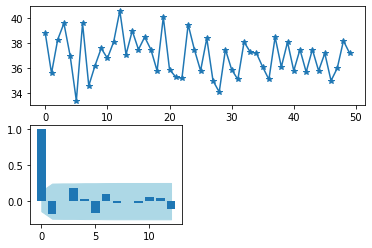

In [8]:
dfname='附录1.4'
input=pd.read_csv('%s.csv'%dfname,header=None)
input.iloc[:,0]=input.iloc[:,0].astype('float')
input=input.values[:,0]

Pk = caculatePk(input, 12, "LB")
LB = caculateLB(Pk, input)
print(Pk)
print(LB)
print((LB[5]))
print((LB[11]))

#statsmodels_lb_test
lb, pvalue = acorr_ljungbox(input, 12)
print(lb)
print((lb[5]))
print((lb[11]))
print(pvalue)

drawer(input, Pk)

2-2A相关计算

[ 1.          0.70245872  0.59538637  0.47791874  0.32807229  0.35578621
  0.3032736   0.29112523  0.16037288  0.05995387 -0.03747485 -0.0771132
 -0.03678528]
[25.69014966 44.53818865 56.94661044 62.9237424  70.11312834 75.4583658
 80.50122265 82.06885514 82.29341942 82.38340677 82.77446378 82.86585671]
75.45836579596163
82.86585670768876
[25.69014966 44.53818865 56.94661044 62.9237424  70.11312834 75.4583658
 80.50122265 82.06885514 82.29341942 82.38340677 82.77446378 82.86585671]
75.45836579596163
82.86585670768876
[4.00867958e-07 2.13135218e-10 2.63821133e-12 7.04135919e-13
 9.70715763e-14 3.08858940e-14 1.08858781e-14 1.87235044e-14
 5.65371102e-14 1.70952786e-13 4.27987869e-13 1.16886977e-12]


/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


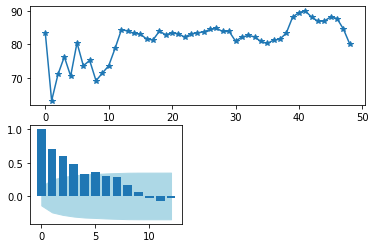

In [5]:
dfname='data1.5'
input=pd.read_csv('%s.csv'%dfname,header=None)
input.iloc[:,0]=input.iloc[:,0].astype('float')
input=input.values[:,0]

Pk = caculatePk(input, 12, "LB")
LB = caculateLB(Pk, input)
print(Pk)
print(LB)
print((LB[5]))
print((LB[11]))

#statsmodels_lb_test
lb, pvalue = acorr_ljungbox(input, 12)
print(lb)
print((lb[5]))
print((lb[11]))
print(pvalue)

drawer(input, Pk)

2-2B相关计算

In [ ]:
dfname='table2.6'
input=pd.read_csv('%s.csv'%dfname,header=None)
input.iloc[:,0]=input.iloc[:,0].astype('float')
input=input.values[:,0]

Pk = caculatePk(input, 12, "LB")
LB = caculateLB(Pk, input)
print(Pk)
print(LB)
print((LB[5]))
print((LB[11]))

#statsmodels_lb_test
lb, pvalue = acorr_ljungbox(input, 12)
print(lb)
print((lb[5]))
print((lb[11]))
print(pvalue)

drawer(input, Pk)

Yt = np.zeros(len(input)-1)
for i in range(0, len(input)-1):
    Yt[i] = input[i+1] - input[i]

Pk = caculatePk(Yt, 12, "LB")
LB = caculateLB(Pk, Yt)
print(Pk)
print(LB)
print((LB[5]))
print((LB[11]))

#statsmodels_lb_test
lb, pvalue = acorr_ljungbox(Yt, 12)
print(lb)
print((lb[5]))
print((lb[11]))
print(pvalue)

drawer(Yt, Pk)

2-2C相关计算